# Mapping natural gas production: a tutorial on plotting maps with energy data in python

When analysing production patterns in the oil and gas industry maps are excellent tools to help in visualizing them. Therefore, it is important for energy analysts to be able to plot them and report them in their analyses. In this notebook I show how to plot a map using the programming language python. In particular, the natural gas production of September 2019 from Mexico's national oil company, PEMEX, is plotted.  

Some words of caution regarding the information presented here are due:

1. When merging the information for field production to the fields shapefile, some information can be lost because of the difference in names as well as known differences in the files from the Ministry of Energy and the National Hydrocarbons Commission. However, the focus of this tutorial is to show how to do it and not an analysis. 

2. This map should not be used for a thorough analysis of production, it is only an example to demonstrate the strength of python for data analysis.

In [19]:
# Import required packages
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [182]:
# Production statistics source: National Hydrocarbon Commission. 
# https://hidrocarburos.gob.mx/estad%C3%ADsticas/#tab-1494

# Source of the shapefiles from the petroleum provinces, fields and mexican states
# The shapefiles are the polygons that form the geographic data
# https://mapa.hidrocarburos.gob.mx/

In [ ]:
# Read the production data frame
# The repository keeps an excel file with the information used
df = pd.read_excel('producción-nacional-de-petroleo-y-gas_CNH.xlsx',
              sheet_name = 'Tabla gas', header = 6, usecols = 'A:F')

In [22]:
# Check the file was uploaded correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534844 entries, 0 to 534843
Data columns (total 6 columns):
Periodo                              534844 non-null datetime64[ns]
Cuenca                               534844 non-null object
Ubicación                            534844 non-null object
Campo                                534844 non-null object
Operador                             534844 non-null object
Producción de Gas Natural (mmpcd)    534844 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 24.5+ MB


In [23]:
# Check the first rows
df.head()

,Periodo,Cuenca,Ubicación,Campo,Operador,Producción de Gas Natural (mmpcd)
0,1960-01-01,Burgos,Aguas someras,MERCURIO,Petróleos Mexicanos,0.0
1,1960-01-01,Burgos,Terrestre,AGAMI,Petróleos Mexicanos,0.0
2,1960-01-01,Burgos,Terrestre,AGUA BLANCA,Petróleos Mexicanos,0.0
3,1960-01-01,Burgos,Terrestre,AKITA,Petróleos Mexicanos,0.0
4,1960-01-01,Burgos,Terrestre,ALCARAVAN,Petróleos Mexicanos,0.0


In [24]:
# Check the last rows
df.tail()

,Periodo,Cuenca,Ubicación,Campo,Operador,Producción de Gas Natural (mmpcd)
534839,2019-09-01,Veracruz,Terrestre,PERDIZ,Petróleos Mexicanos,1.449486
534840,2019-09-01,Veracruz,Terrestre,RABEL,Petróleos Mexicanos,1.216933
534841,2019-09-01,Veracruz,Terrestre,RINCON PACHECO,Petróleos Mexicanos,0.424006
534842,2019-09-01,Veracruz,Terrestre,SAN PABLO,Petróleos Mexicanos,0.816300
534843,2019-09-01,Veracruz,Terrestre,VISTOSO,Petróleos Mexicanos,1.430118


In [183]:
# Get the total number of provinces (cuencas) and their names
print('Number of provinces:' + str(len(df['Cuenca'].unique())))
print('Provinces:')
print(df['Cuenca'].unique())


Number of provinces:9
Provinces:
['Burgos' 'Cinturon Plegado de Chiapas' 'Cuencas del Sureste' 'Otros'
 'Plataforma Burro-Picachos' 'Plataforma de Yucatan' 'Sabinas'
 'Tampico-Misantla' 'Veracruz']


In [26]:
# Filter data to get only production from Sep 2019 and PEMEX
prodsep19 = df[(df['Periodo'] == '2019-09-01') & (df['Operador'] == 'Petróleos Mexicanos')]
prodsep19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 534483 to 534843
Data columns (total 6 columns):
Periodo                              299 non-null datetime64[ns]
Cuenca                               299 non-null object
Ubicación                            299 non-null object
Campo                                299 non-null object
Operador                             299 non-null object
Producción de Gas Natural (mmpcd)    299 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 16.4+ KB


In [27]:
# Get natural gas production by province
prodsep19.groupby('Cuenca')['Producción de Gas Natural (mmpcd)'].sum()

Cuenca
Burgos                  497.698082
Cuencas del Sureste    3917.516872
Sabinas                   9.166331
Tampico-Misantla        147.028845
Veracruz                201.516806
Name: Producción de Gas Natural (mmpcd), dtype: float64

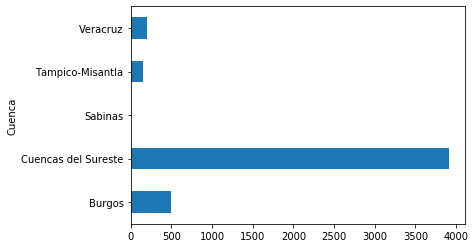

In [184]:
# Plot natural gas production by province
# for exploratory purposes
prodsep19.groupby('Cuenca')['Producción de Gas Natural (mmpcd)'].sum().plot.barh()

# Mapping natural gas production of Pemex's fields by province

In [175]:
# Using geopandas it is straightforward to read shapefiles and 
# plot as maps. Each geopandas data frame holds the geometric information.
# It is like a pandas data frame with geographic information
provincias = gpd.read_file('provincias/Provincias Petroleras.shp')
campos = gpd.read_file('campos/Campos con Reservas (al 1° de Enero de 2019).shp')
estados = gpd.read_file('estados/Estados.shp')

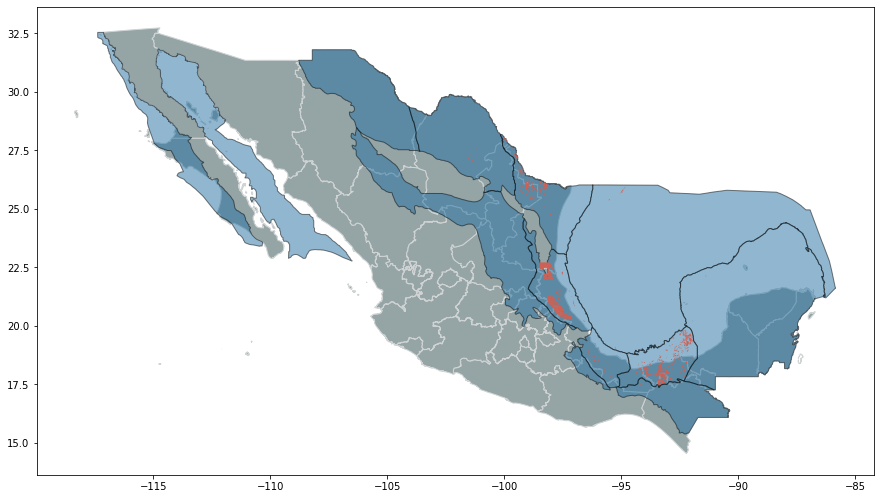

In [185]:
# Plot all the polygons from the shapefiles to check
# the loading is ok
fig, ax = plt.subplots(1, figsize = (15,15))
estados.plot(ax = ax, facecolor = '#95A5A6', edgecolor = '#D0D3D4')
provincias.plot(ax = ax,facecolor = '#2471A3',alpha = 0.5, edgecolor='k')
campos.plot(ax = ax, facecolor = '#CD6155', lw = 3)

# Prepare data for plotting

In [177]:
# Only keep provinces that have production for sep 2019
# First, match the name of provinces between the province data and
# sep 2019 production

## Create a Mapping and create new column new column

cuencas_mapping = {
    'SABINAS - BURRO - PICACHOS':'Sabinas',
    'TAMPICO-MISANTLA':'Tampico-Misantla', 
    'SURESTE':'Sureste',
    'VERACRUZ':'Veracruz',
    'BURGOS':'Burgos'
}

provincias['sep19_labels'] = provincias['nombre'].map(cuencas_mapping)

## Create new provinces data frame with only the required provinces
provincias2019 = provincias.dropna()

provincias2019

,gid,nombre,situacion,ubicacion,area_km2,geometry,sep19_labels
3,4,SABINAS - BURRO - PICACHOS,PRODUCTORAS,TERRESTRE,118334.65590,POLYGON ((-100.1656668045854 28.17032492229669...,Sabinas
6,7,TAMPICO-MISANTLA,PRODUCTORAS,TERRESTRE-PLATAFORMA,56936.89603,"POLYGON ((-97.982160991694 23.25808260590185, ...",Tampico-Misantla
8,9,SURESTE,PRODUCTORAS,TERRESTRE-PLATAFORMA,58469.17287,POLYGON ((-92.33997626537621 17.62623012203005...,Sureste
9,10,VERACRUZ,PRODUCTORAS,TERRESTRE-PLATAFORMA,32778.20111,POLYGON ((-94.77896073940593 18.80843184439635...,Veracruz
12,13,BURGOS,PRODUCTORAS,TERRESTRE-PLATAFORMA,73803.40543,"POLYGON ((-100.1582588885719 28.1675055559636,...",Burgos


In [178]:
# Now merge production data to fields data
# the base data frame needs to be fields, because it is a geopandas df

## First, turn everything to lower in order to avoid different letter cases
prodsep19['merge_key'] = prodsep19['Campo'].str.lower()
campos['merge_key'] = campos['nombre'].str.lower()

# Merge data frames
campos_todo = pd.merge(campos, prodsep19,
        left_on='merge_key', right_on='merge_key',
        how='left')

# get centroids of the fields (latitude and longitude)
# in order to plot them using a scatterplot for more control
campos_todo['lon'] = campos_todo.geometry.centroid.x
campos_todo['lat'] = campos_todo.geometry.centroid.y

C:\ProgramData\Anaconda3\envs\NatGas_Dashboard\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


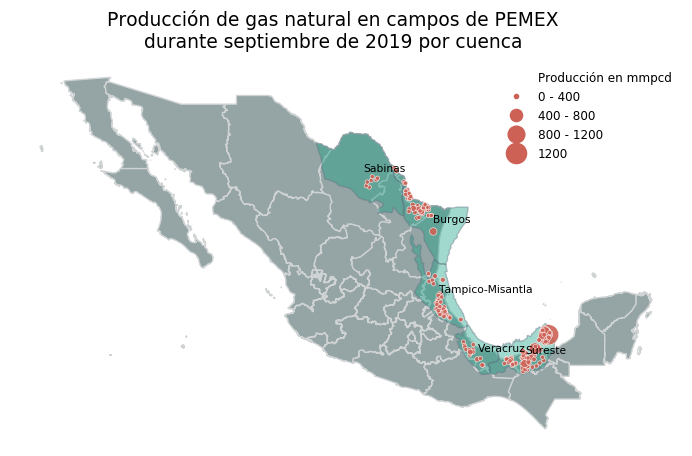

In [187]:
# Create plot
fig, ax = plt.subplots(1, figsize=(1024/96, 512/96), dpi = 96)

## Mexico base map
estados.plot(ax = ax, facecolor = '#95A5A6', edgecolor = '#D0D3D4')

## Petroleum/Gas provinces that produced gas in sep 2019
provincias2019.plot(ax = ax, facecolor = '#16A085', alpha = 0.4,
                   edgecolor = '#5D6D7E')

## Plot each field with size given by its production level
sns.scatterplot(campos_todo['lon'], campos_todo['lat'], linewidth=0.4, alpha = 0.9,
           color = '#CD6155',size = campos_todo['Producción de Gas Natural (mmpcd)'],
           sizes=(10, 230), ax = ax)
    
## Now some general styling for the map

### Spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### Title and remove axis
fig.suptitle('Producción de gas natural en campos de PEMEX\ndurante septiembre de 2019 por cuenca', fontsize=14);
plt.axis('off');

### Legend adjustment
legend = ax.legend(loc='upper right',
          frameon=False, fontsize = 9)

# Manuallt set the labels for each level
legend.texts[0].set_text('Producción en mmpcd')
legend.texts[1].set_text('0 - 400')
legend.texts[2].set_text('400 - 800')
legend.texts[3].set_text('800 - 1200')
legend.texts[4].set_text('1200')

# Manually color de points of the legend
legend.legendHandles[1].set_color('#CD6155')
legend.legendHandles[2].set_color('#CD6155')
legend.legendHandles[3].set_color('#CD6155')
legend.legendHandles[4].set_color('#CD6155')


# Label the petroleum provinces
texts = []

for x, y, label in zip(provincias2019.geometry.centroid.x, provincias2019.geometry.centroid.y,
                       provincias2019['sep19_labels']):
    texts.append(plt.text(x, y, label, fontsize = 8))
    


In [189]:
fig.savefig('Pemex_NatGas_Production_Sep2019.png')